In [2]:
import numpy as np
import pandas as pd
import os
import json
import collections
import re
from pathlib import Path
import seaborn as sns

In [3]:
import matplotlib
#matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    "font.serif": [],  
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8,
    "text.latex.preamble": [r'\usepackage{amsmath}'], #for \text command"
})
import matplotlib.pyplot as plt


In [4]:
np.linspace(-1.5, 4.5, 100)[45], np.linspace(-1.5, 4.5, 25)[12]


(1.2272727272727275, 1.5)

In [9]:
(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/cnngp_v2/nngp_14.pkl.gz")["test"]


'cv'

/homes/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: streamed pgf-code does not support raster graphics, consider using the pgf-to-pdf option


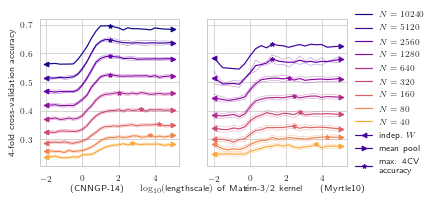

In [10]:
(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/cntk14_cv.pkl.gz")
mean = mean.drop([10, 20,], axis="columns")
err = err.drop([10, 20,], axis="columns")


sns.set_style("whitegrid")
sns.set_context("paper")

log_lengthscales = np.array([-2, *np.linspace(-1.5, 4.5, 25), 5])
lengthscales = 10**log_lengthscales

fig, axes = plt.subplots(1, 2, figsize=(5.50107, 2.7), sharex=True, sharey=True)
ax = axes[0]

artists = []
labels = []

colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))[::-1]
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = log_lengthscales
    y_axis = mean[column].values
    y_err = err[column]
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 10240:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.idxmax()[column]
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
    
        idx = mean.idxmax()[column]
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    #if column == 10240:
    #    y_upper = mean.loc[idx, column] - 0.01
    #else:
    #    y_upper = mean.loc[idx, column] - err.loc[idx, column]-0.01
    #x_bar = x_axis[idx]
    #ax.plot([x_bar, x_bar], [y_upper, 0.1], color=color, ls='--', linewidth=1)
    
#empty_artist, = ax.plot([], [], linewidth=0.0)
ax.set_ylabel("4-fold cross-validation accuracy")
#ax.legend((*artists, indep_line, meanp_line, maxcv_line),
#          (*labels, "indep. $W$", "mean pool", "max. CV acc."),
#          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(2, 0.5, 0, 0))

#fig.tight_layout()
#plt.savefig("../neurips2020/fig/cntk14.pgf")


(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/m10_cv.pkl.gz")
mean = mean.drop([10, 20,], axis="columns")
err = err.drop([10, 20,], axis="columns")


#sns.set_style("whitegrid")
#sns.set_context("paper")

log_lengthscales = np.array([-2, *np.linspace(-1.5, 4.5, 100)[::5], 5])
lengthscales = 10**log_lengthscales

ax = axes[1]

artists = []
labels = []

empty_1024col, = ax.plot([], [], color=colors[-1])
artists.append(empty_1024col)
labels.append(f"$N={10240}$")

#colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = log_lengthscales
    y_axis = mean[column].values
    y_err = err[column]
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 5120:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.idxmax()[column]
        if idx != 0:
            idx = (idx-1)//5+1
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
    
        idx = mean.idxmax()[column]
        if idx != 0:
            idx = (idx-1)//5+1
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    #if column == 10240:
    #    y_upper = mean.loc[idx, column] - 0.01
    #else:
    #    y_upper = mean.loc[idx, column] - err.loc[idx, column]-0.01
    #x_bar = x_axis[idx]
    #ax.plot([x_bar, x_bar], [y_upper, 0.1], color=color, ls='--', linewidth=1)
    
#empty_artist, = ax.plot([], [], linewidth=0.0)
#ax.set_ylabel("4-fold cross-validation accuracy")
ax.legend((*artists, indep_line, meanp_line, maxcv_line),
          (*labels, "indep. $W$", "mean pool", "max. 4CV\n accuracy"),
          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(1, 0.5, 0, 0))
plt.figtext(0.2, -0.02, r"(CNNGP-14) \hspace{1em}  $\log_{10}($lengthscale$)$ of Matérn-3/2 kernel \hspace{1em}  (Myrtle10)")
plt.savefig("../neurips2020/fig/myrtle10.pgf", bbox_inches="tight")


/homes/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: streamed pgf-code does not support raster graphics, consider using the pgf-to-pdf option


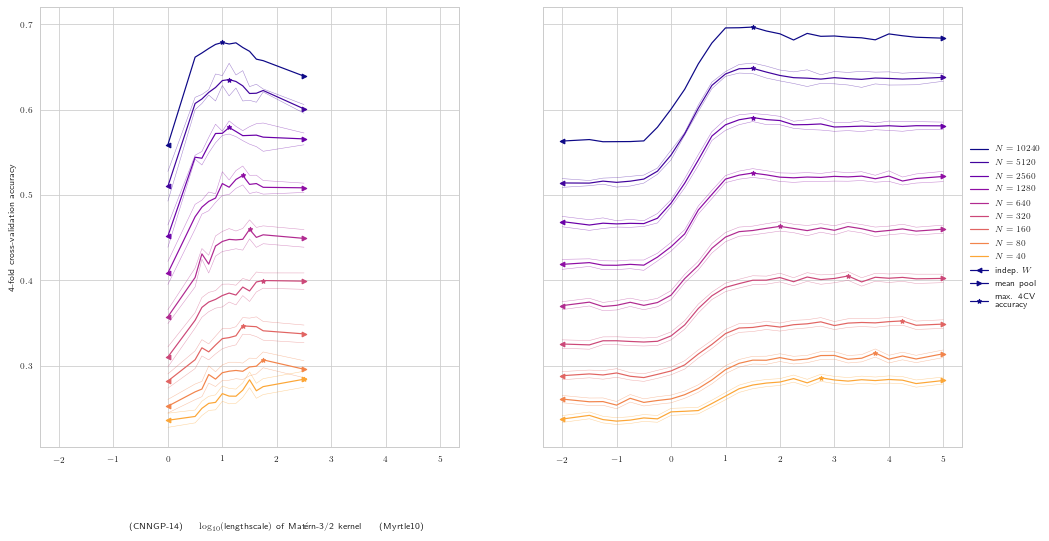

In [18]:
(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/cnngp_v2/nngp_14.pkl.gz")["cv"]
mean = mean.drop([ 20,], axis="columns")
err = err.drop([ 20,], axis="columns")
mean.index = range(len(mean.index))
err.index = range(len(mean.index))


sns.set_style("whitegrid")
sns.set_context("paper")

log_lengthscales = np.array([0, *np.linspace(0.5, 1.75, 11), 2.5])
lengthscales = 10**log_lengthscales

fig, axes = plt.subplots(1, 2, figsize=(3*5.5107, 3*2.7), sharex=True, sharey=True)
ax = axes[0]

artists = []
labels = []

colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))[::-1]
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = log_lengthscales
    y_axis = mean[column].values
    y_err = err[column]
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 10240:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.idxmax()[column]
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
    
        idx = mean.idxmax()[column]
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    #if column == 10240:
    #    y_upper = mean.loc[idx, column] - 0.01
    #else:
    #    y_upper = mean.loc[idx, column] - err.loc[idx, column]-0.01
    #x_bar = x_axis[idx]
    #ax.plot([x_bar, x_bar], [y_upper, 0.1], color=color, ls='--', linewidth=1)
    
#empty_artist, = ax.plot([], [], linewidth=0.0)
ax.set_ylabel("4-fold cross-validation accuracy")
#ax.legend((*artists, indep_line, meanp_line, maxcv_line),
#          (*labels, "indep. $W$", "mean pool", "max. CV acc."),
#          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(2, 0.5, 0, 0))

#fig.tight_layout()
#plt.savefig("../neurips2020/fig/cntk14.pgf")


(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/cntk14_cv.pkl.gz")
mean = mean.drop([10, 20,], axis="columns")
err = err.drop([10, 20,], axis="columns")

log_lengthscales = np.array([-2, *np.linspace(-1.5, 4.5, 25), 5])
lengthscales = 10**log_lengthscales

ax = axes[1]

artists = []
labels = []

colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))[::-1]
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = log_lengthscales
    y_axis = mean[column].values
    y_err = err[column]
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 10240:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.idxmax()[column]
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
    
        idx = mean.idxmax()[column]
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')

    
#empty_artist, = ax.plot([], [], linewidth=0.0)
#ax.set_ylabel("4-fold cross-validation accuracy")
ax.legend((*artists, indep_line, meanp_line, maxcv_line),
          (*labels, "indep. $W$", "mean pool", "max. 4CV\n accuracy"),
          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(1, 0.5, 0, 0))
plt.figtext(0.2, -0.02, r"(CNNGP-14) \hspace{1em}  $\log_{10}($lengthscale$)$ of Matérn-3/2 kernel \hspace{1em}  (Myrtle10)")
plt.savefig("../neurips2020/fig/myrtle10.pgf", bbox_inches="tight")


In [4]:
np.linspace(-1.5, 3.5, 25)[15]

1.625

In [5]:
(m10_mean, m10_err) = pd.read_pickle("~/Programacio/cnn-limits/figures/m10_cv.pkl.gz")


In [6]:
m10_idxmax = m10_mean.idxmax()

In [7]:
mean

,40,80,160,320,640,1280,2560,5120
0,0.247837,0.282572,0.301322,0.340084,0.384195,0.444832,0.515755,0.585547
1,0.248798,0.266947,0.300000,0.334195,0.381731,0.439002,0.493099,0.550000
6,0.249399,0.263522,0.296394,0.334255,0.384435,0.435817,0.494531,0.548633
11,0.248077,0.267007,0.290024,0.339784,0.386659,0.438462,0.495052,0.546680
16,0.248618,0.264363,0.299219,0.336298,0.378966,0.442308,0.492318,0.545508
21,0.247716,0.270433,0.302103,0.343870,0.388762,0.447957,0.511979,0.564258
26,0.258353,0.282452,0.317788,0.364423,0.414483,0.473618,0.532813,0.592383
31,0.262861,0.290204,0.330889,0.377885,0.433954,0.494111,0.557682,0.616406
36,0.268149,0.296034,0.333413,0.384555,0.440084,0.508113,0.560807,0.627148
41,0.274760,0.296334,0.340805,0.393029,0.444832,0.511178,0.566536,0.619336


In [8]:
(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/m10_rbf_cv.pkl.gz")
mean = mean.drop([ 20,], axis="columns")
err = err.drop([ 20,], axis="columns")

sns.set_style("whitegrid")
sns.set_context("paper")

lengthscales = mean.index

fig, axes = plt.subplots(1, 2, figsize=(5.50107, 2.7), sharex=False, sharey=True)
ax = axes[0]

artists = []
labels = []

# use same colors
#colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))[::-1]
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = lengthscales
    y_axis = mean[column].values
    y_err = err[column]
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 10240:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        #meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.loc[:, column].values.argmax()
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        #ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
    
        idx = mean.loc[:, column].values.argmax()
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    y = m10_mean.loc[m10_idxmax[column], column]
    e = m10_err.loc[m10_idxmax[column], column]
    ax.plot([x_axis.min(), x_axis.max()], [y, y], color=color, ls='--', alpha=1, linewidth=0.7)
    ax.plot([x_axis.min(), x_axis.max()], [y+e, y+e], color=color, ls=':', linewidth=1, alpha=1)
    ax.plot([x_axis.min(), x_axis.max()], [y-e, y-e], color=color, ls=':', linewidth=1, alpha=1)
    #if column == 10240:
    #    y_upper = mean.loc[idx, column] - 0.01
    #else:
    #    y_upper = mean.loc[idx, column] - err.loc[idx, column]-0.01
    #x_bar = x_axis[idx]
    #ax.plot([x_bar, x_bar], [y_upper, 0.1], color=color, ls='--', linewidth=1)
    
empty_artist, = ax.plot([], [], linewidth=0.0)
ax.set_ylabel("4-fold cross-validation accuracy")

#ax.legend((*artists, indep_line, meanp_line, maxcv_line),
#          (*labels, "indep. $W$", "mean pool", "max. CV acc."),
#          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(2, 0.5, 0, 0))

#fig.tight_layout()
#plt.savefig("../neurips2020/fig/cntk14.pgf")


(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/m10_matern_cv.pkl.gz")
mean = mean.drop([ 20,], axis="columns")
err = err.drop([ 20,], axis="columns")

err = err.dropna()
mean = mean.loc[err.index, :]

lengthscales = mean.index

ax = axes[1]

artists = []
labels = []

colors = plt.get_cmap('plasma')(np.linspace(0., 0.8, len(mean.columns)))[::-1]
for column, color in list(zip(mean.columns, colors))[::-1]:
    x_axis = lengthscales
    y_axis = mean[column].values
    y_err = err[column].fillna(0).values
    
    line, = ax.plot(x_axis, y_axis, color=color)
    labels.append(f"$N={column}$")
    artists.append(line)
    if column == 1280:
        
        indep_line, = ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        #meanp_line, = ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')

        idx = mean.loc[:, column].values.argmax()
        maxcv_line, =ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
    else:
        ax.plot([x_axis[0]], [y_axis[0]], color=color, marker='<')
        #ax.plot([x_axis[-1]], [y_axis[-1]], color=color, marker='>')
        idx = mean.loc[:, column].values.argmax()
        ax.plot([x_axis[idx]], [y_axis[idx]], color=color, marker='*')
        
    ax.plot(x_axis, y_axis+y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
    ax.plot(x_axis, y_axis-y_err, color=color, linewidth=0.5, ls='-', alpha=0.5)
        
    y = m10_mean.loc[m10_idxmax[column], column]
    e = m10_err.loc[m10_idxmax[column], column]
    if column == 1280:
        myrtle10_line, = ax.plot([x_axis.min(), x_axis.max()], [y, y], color=color, ls='--', alpha=1, linewidth=0.7)
    else:
        ax.plot([x_axis.min(), x_axis.max()], [y, y], color=color, ls='--', alpha=1, linewidth=0.7)
    ax.plot([x_axis.min(), x_axis.max()], [y+e, y+e], color=color, ls=':', linewidth=1, alpha=1)
    ax.plot([x_axis.min(), x_axis.max()], [y-e, y-e], color=color, ls=':', linewidth=1, alpha=1)
    #if column == 10240:
    #    y_upper = mean.loc[idx, column] - 0.01
    #else:
    #    y_upper = mean.loc[idx, column] - err.loc[idx, column]-0.01
    #x_bar = x_axis[idx]
    #ax.plot([x_bar, x_bar], [y_upper, 0.1], color=color, ls='--', linewidth=1)
    
empty_artist, = ax.plot([], [], linewidth=0.0)
ax.legend((*artists, empty_artist, indep_line, maxcv_line, myrtle10_line),
          (*labels, "", "indep. $W$", "max. CV acc.", "Best Myrtle10"),
          frameon=False, ncol=1 , loc='center left', bbox_to_anchor=(1, 0.5, 0, 0))

plt.figtext(0.15, -0.02, r"(Squared Exponential) \hspace{1em} lengthscale of  kernel \hspace{1em}  (Matérn-3/2)")
plt.savefig("../neurips2020/fig/internal_correlation.pgf", bbox_inches="tight")


/homes/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:125: UserWarning: streamed pgf-code does not support raster graphics, consider using the pgf-to-pdf option


In [9]:
(mean, err) = pd.read_pickle("~/Programacio/cnn-limits/figures/m10_matern_cv.pkl.gz")


In [10]:
err.fillna(0)

,20,40,80,160,320,640,1280
0.200000,0.015910,0.018441,0.026169,0.022133,0.028125,0.013104,0.009375
0.500000,0.017886,0.019229,0.017475,0.020284,0.022089,0.026440,0.012500
0.700000,0.015519,0.017782,0.016189,0.016457,0.020821,0.016213,0.040625
1.000000,0.023071,0.024178,0.038862,0.040638,0.044000,0.001563,0.000000
1.300000,0.024091,0.027028,0.026118,0.035257,0.005916,0.034375,0.000000
1.500000,0.021129,0.028663,0.028459,0.031155,0.030975,0.004688,0.000000
1.650000,0.012132,0.013229,0.013263,0.013719,0.014091,0.014075,0.010928
1.700000,0.012611,0.014889,0.016120,0.018025,0.013533,0.011515,0.014159
1.750000,0.012996,0.016941,0.017770,0.017650,0.014027,0.014421,0.026943
1.800000,0.013245,0.013628,0.017377,0.013571,0.020200,0.029033,0.018772


In [11]:
pd.read_pickle("~/Programacio/cnn-limits/figures/m10_rbf_test.pkl.gz")["test"][0]

,10,20,40,80,160,320,640,1280
5.912,0.167763,0.201289,0.230522,0.269981,0.325762,0.391,0.44195,0.4963


In [12]:
pd.read_pickle("~/Programacio/cnn-limits/figures/m10_test.pkl.gz")["test"][0]

,10,20,40,80,160,320,640,1280,2560
0,0.155416,0.167485,0.193381,0.235994,0.285281,0.340412,0.392625,0.45350,0.5138
1,0.155253,0.166685,0.183806,0.230428,0.281006,0.339862,0.392875,0.44780,0.5126
6,0.154566,0.171846,0.190761,0.232809,0.284894,0.334162,0.399500,0.45300,0.5126
11,0.155300,0.172400,0.191387,0.233237,0.273162,0.339850,0.395375,0.45370,0.5123
16,0.154887,0.175679,0.192609,0.232141,0.275944,0.338337,0.398075,0.44795,0.5153
21,0.156396,0.171639,0.197911,0.240447,0.281994,0.348962,0.399625,0.46845,0.5255
26,0.158098,0.175427,0.203558,0.248641,0.310800,0.362787,0.430525,0.49145,0.5526
31,0.159922,0.182293,0.211980,0.266178,0.327644,0.381700,0.453125,0.51250,0.5754
36,0.160564,0.187251,0.205391,0.268834,0.329081,0.387300,0.455325,0.52240,0.5836
41,0.163582,0.192188,0.215819,0.276147,0.324219,0.393312,0.458050,0.52550,0.5853


In [13]:
pd.read_pickle("~/Programacio/cnn-limits/figures/m10_test.pkl.gz")["cv"][0].idxmax()

10       0
20      36
40      56
80      46
160     66
320     41
640     71
1280    91
2560    46
dtype: int64